In [1]:
from tensorflow import concat, argmax, expand_dims
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory, plot_model

# Load Model from file

In [3]:
# testPath = 'C:/Users/alexi/Documents/School/Senior/Senior Project/Color Recognition/veh-color-mod/test'
testPath = '/Users/spencerhirsch/Documents/GitHub/senior/datasets/veh-color-mod/test'
class_names = ['white', 'black', 'grey-silver', 'red', 'blue', 'brown', 'green', 'beige-tan', 'orange', 'gold', 'yellow', 'purple', 'pink']
size = 64
final_model = load_model('/Users/spencerhirsch/Documents/GitHub/senior/datasets/color_rec_model.h5')
# final_model = load_model('C:/Users/alexi/Documents/School/Senior/Senior Project/Color Recognition/color_rec_model.h5')

# Evaluate Model

In [4]:
test_ds = image_dataset_from_directory(directory=testPath, class_names=class_names,seed=0, image_size=(size,size), shuffle=False)
final_model.evaluate(test_ds)

Found 1538 files belonging to 13 classes.
49/49 [==============================] - 2s 30ms/step - loss: 1.0669 - accuracy: 0.9051


[1.0669498443603516, 0.905071496963501]

# Test Dataset Examples

In [5]:
## Store testX and testY data so we can use the classification report
true_categories = concat([y for x, y in test_ds], axis=0)
testX = concat([x for x, y in test_ds], axis=0)

49/49 [==============================] - 1s 27ms/step


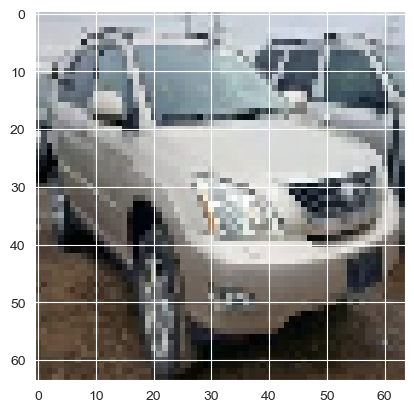

The model is 99.79009628295898% confident that the image is a beige-tan vehicle
The correct color of this car is beige-tan


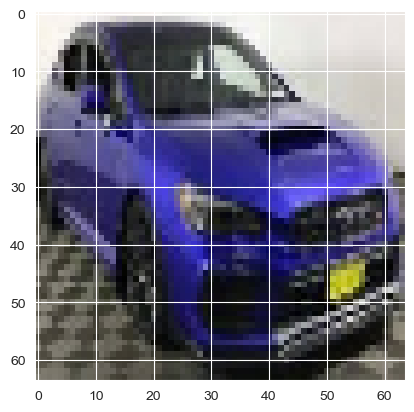

The model is 92.25842952728271% confident that the image is a purple vehicle
The correct color of this car is purple


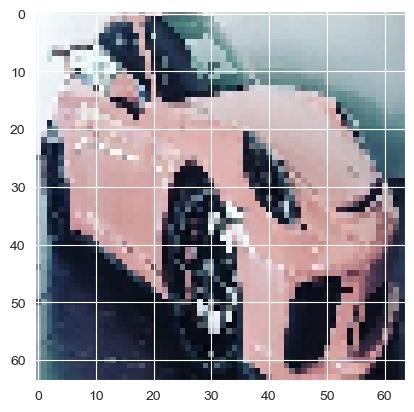

The model is 98.25779795646667% confident that the image is a pink vehicle
The correct color of this car is pink


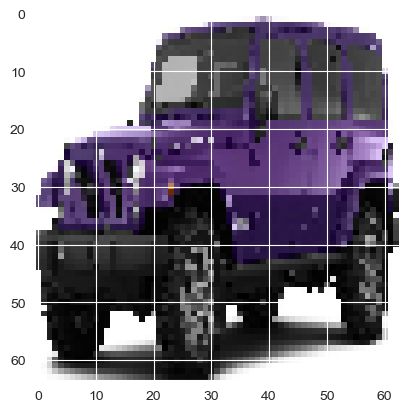

The model is 99.9811589717865% confident that the image is a purple vehicle
The correct color of this car is purple


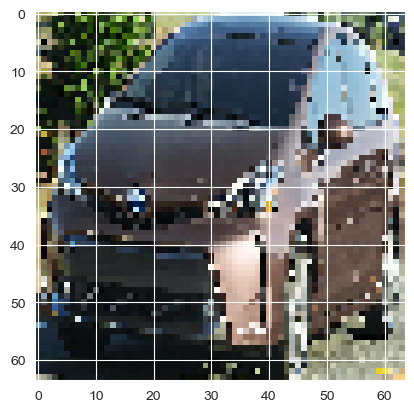

The model is 96.57815098762512% confident that the image is a brown vehicle
The correct color of this car is brown


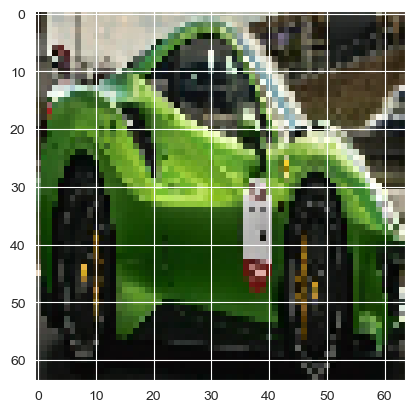

The model is 99.92535710334778% confident that the image is a green vehicle
The correct color of this car is green


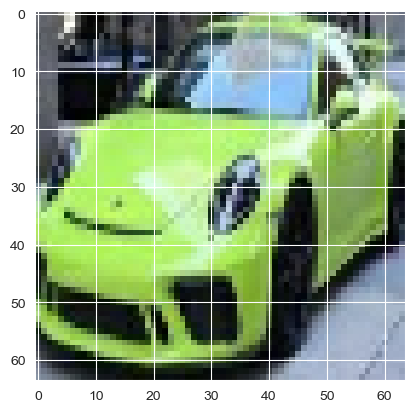

The model is 99.19008612632751% confident that the image is a green vehicle
The correct color of this car is green


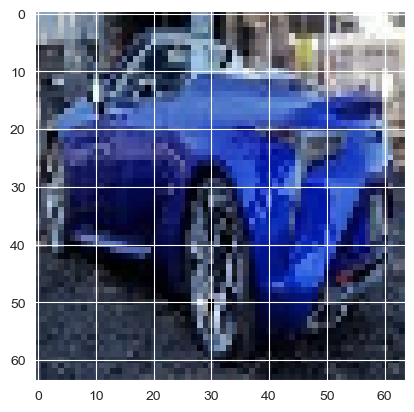

The model is 99.8097836971283% confident that the image is a blue vehicle
The correct color of this car is blue


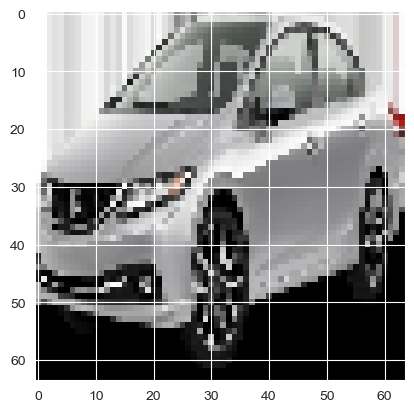

The model is 98.06134700775146% confident that the image is a grey-silver vehicle
The correct color of this car is grey-silver


In [6]:
from random import randint
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

confidence_levels = final_model.predict(testX)
predictions = argmax(confidence_levels, axis=1)
for i in range(9):
    j = randint(0, 1555)
    x_val = testX[j]

    prediction = predictions[j]
    confidences = confidence_levels[j]
    pred_class = class_names[prediction]
    confidence = confidences[prediction]

    ## display image and prediction
    x_val = x_val /255
    plt.imshow(x_val.numpy())
    plt.show()
    print('The model is ' + str(confidence*100) + '% confident that the image is a ' + pred_class + ' vehicle')
    print('The correct color of this car is ' + class_names[true_categories[j].numpy()])

# Edge Case Examples

In [11]:
edgePath = '/Users/spencerhirsch/Documents/GitHub/senior/datasets/edge_cases'
edge_ds = image_dataset_from_directory(directory=edgePath,seed=0, image_size=(size,size))

edgeX = concat([x for x, y in edge_ds], axis=0)

Found 5 files belonging to 1 classes.


1/1 [==============================] - 0s 29ms/step


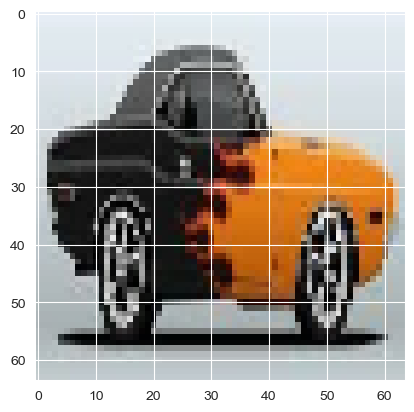

The model is 84.11343097686768% confident that the image is a orange vehicle


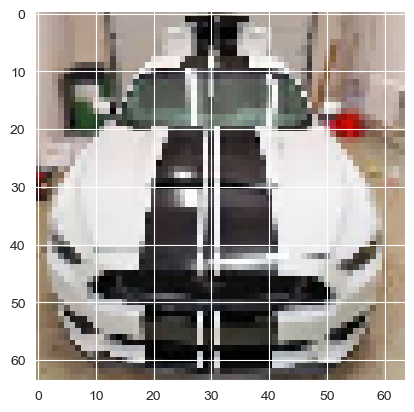

The model is 95.3961193561554% confident that the image is a white vehicle


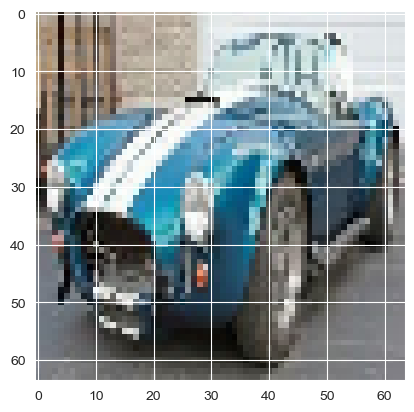

The model is 96.10991477966309% confident that the image is a blue vehicle


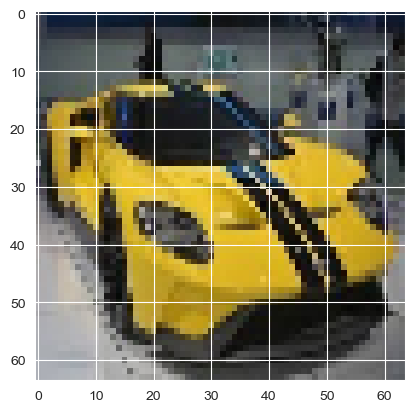

The model is 96.53674960136414% confident that the image is a yellow vehicle


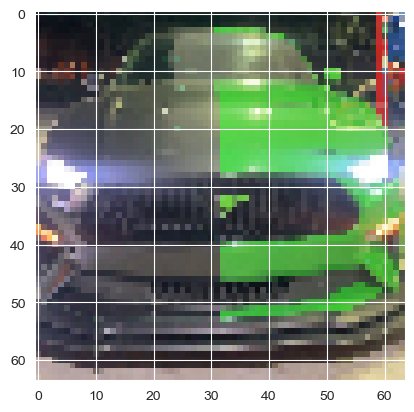

The model is 67.70119667053223% confident that the image is a green vehicle


In [12]:
from matplotlib import pyplot as plt

confidence_levels = final_model.predict(edgeX)
predictions = argmax(confidence_levels, axis=1)
for i in range(len(predictions)):
    x_val = edgeX[i]

    prediction = predictions[i]
    confidences = confidence_levels[i]
    pred_class = class_names[prediction]
    confidence = confidences[prediction]

    ## display image and prediction
    x_val = x_val / 255
    plt.imshow(x_val.numpy())
    plt.show()
    print('The model is ' + str(confidence*100) + '% confident that the image is a ' + pred_class + ' vehicle')